# Kings County Housing Prices Bakeoff


## Business Problem:

1. What are the most important variables in predicting the selling price of a house?

2. What variables can we create to make a strong model?

3. What type or types of statistical relationship can we use to create a strong model?

In [3]:
# Import most important packages
import pyforest

## Read in Data

The first step is read the data from a csv file to a Pandas DataFrame.

In [5]:
test = pd.read_csv('./data/kc_house_data_test_features.csv', index_col=0)
train = pd.read_csv('./data/kc_house_data_train.csv', index_col=0)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Exploratory Data Analysis 
### Understanding the dataframes

On this step, we will take a look at the dataframe and get familiar to the data.

In [8]:
# Check the shape of the dataframe
print('Shape:' + str(train.shape))

# Check the first 5 rows of the train dataframe
train.head()

Shape:(17290, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,...,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
1,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,...,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
2,7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,2,...,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
3,9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,2,...,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
4,9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,0,...,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050


In [9]:
# Check the shape of the dataframe
print('Shape:' + str(test.shape))

# Check the first 5 rows of the train dataframe
test.head()

Shape:(4323, 20)


,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,1974300020,20140827T000000,4,2.50,2270,11500,1.0,0,0,3,8,1540,730,1967,0,98034,47.7089,-122.241,2020,10918
1,1974300020,20150218T000000,4,2.50,2270,11500,1.0,0,0,3,8,1540,730,1967,0,98034,47.7089,-122.241,2020,10918
2,3630020380,20141107T000000,3,2.50,1470,1779,2.0,0,0,3,8,1160,310,2005,0,98029,47.5472,-121.998,1470,1576
3,1771000290,20141203T000000,3,1.75,1280,16200,1.0,0,0,3,8,1030,250,1976,0,98077,47.7427,-122.071,1160,10565
4,5126310470,20150115T000000,4,2.75,2830,8126,2.0,0,0,3,8,2830,0,2005,0,98059,47.4863,-122.140,2830,7916


In [13]:
# Checking files types, and null values
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4323 entries, 0 to 4322
Data columns (total 20 columns):
id               4323 non-null int64
date             4323 non-null object
bedrooms         4323 non-null int64
bathrooms        4323 non-null float64
sqft_living      4323 non-null int64
sqft_lot         4323 non-null int64
floors           4323 non-null float64
waterfront       4323 non-null int64
view             4323 non-null int64
condition        4323 non-null int64
grade            4323 non-null int64
sqft_above       4323 non-null int64
sqft_basement    4323 non-null int64
yr_built         4323 non-null int64
yr_renovated     4323 non-null int64
zipcode          4323 non-null int64
lat              4323 non-null float64
long             4323 non-null float64
sqft_living15    4323 non-null int64
sqft_lot15       4323 non-null int64
dtypes: float64(4), int64(15), object(1)
memory usage: 709.2+ KB


In [14]:
# Checking basic statistical information
train.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.729000e+04,1.729000e+04,17290.000000,17290.000000,17290.000000,1.729000e+04,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000
mean,4.565502e+09,5.407395e+05,3.372470,2.111943,2081.464604,1.524340e+04,1.490312,0.007981,0.238519,3.408502,7.654425,1789.306015,292.158589,1970.792019,83.806304,98078.193175,47.560058,-122.214258,1987.986698,12873.475824
std,2.874656e+09,3.733190e+05,0.939346,0.770476,920.018539,4.230462e+04,0.538909,0.088985,0.775229,0.651296,1.174718,829.265107,443.151874,29.343516,400.329376,53.607949,0.138412,0.140857,684.802635,27227.437583
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.720000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,659.000000
25%,2.114701e+09,3.210000e+05,3.000000,1.500000,1430.000000,5.081250e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1951.000000,0.000000,98033.000000,47.471200,-122.329000,1490.000000,5111.250000
50%,3.903650e+09,4.500000e+05,3.000000,2.250000,1920.000000,7.642000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1974.000000,0.000000,98065.000000,47.571600,-122.230000,1840.000000,7622.500000
75%,7.301150e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.072575e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2214.500000,560.000000,1996.000000,0.000000,98118.000000,47.677900,-122.126000,2360.000000,10101.750000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,858132.000000


### Findings:
- The train data set contains 17290 rowns and 22 columns
- The test data set contains 4323 rows and  21 columns. It doesn't contain the columns price as expected
- The columns Unnamed: 0 is useless. It's just a repetition of the indexes.
- One of the houses contains 33 bedroom. It might be an outlier or incorrect data
- There aren't any null values.

## Create preliminary data visualizations

Here we will create some preliminary data visualizations to have a better idea of how the data set looks like.

Data visualizations:
- Histogram
- Correlation heatmap
- Scatterplot matrix
- Regression line plot

<IPython.core.display.Javascript object>

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/opt/anaconda3/envs/

<IPython.core.display.Javascript object>

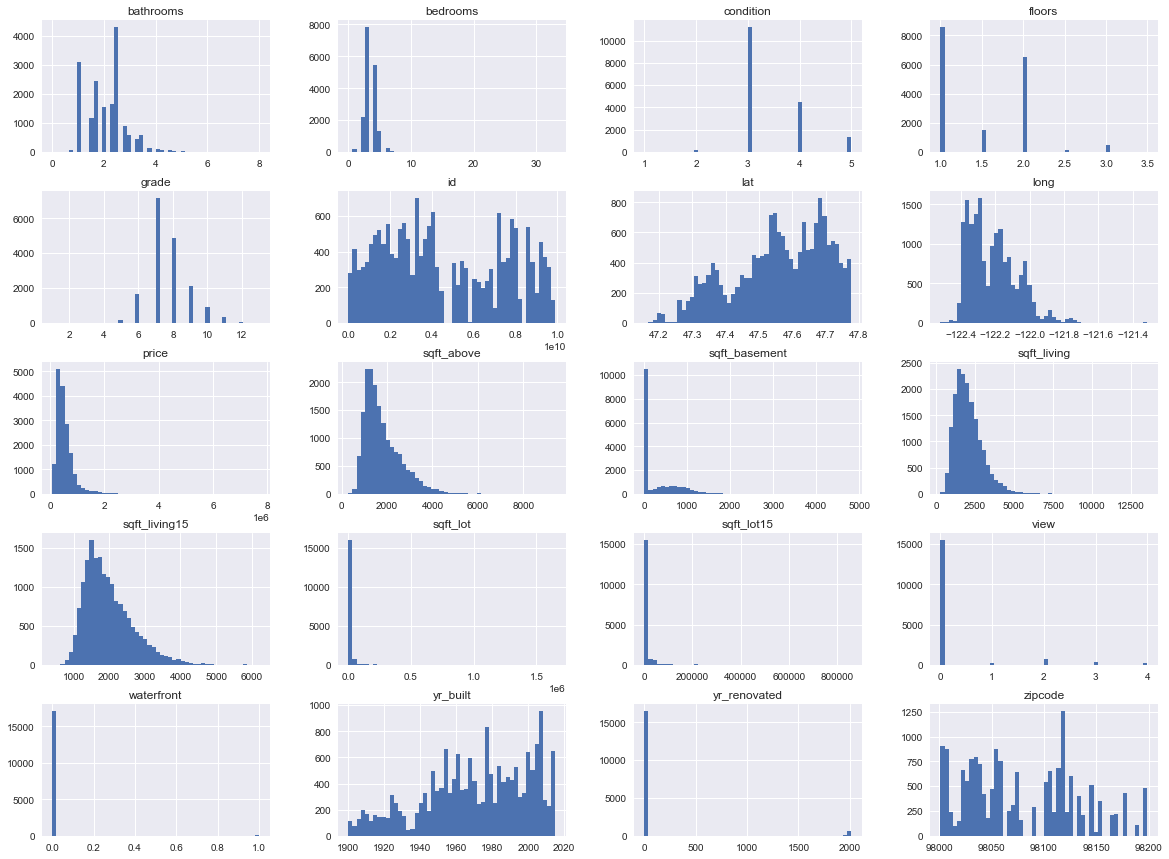

In [16]:
# Create a histogram of the data set to analyse the shape of the data
plt.style.use('seaborn')

train.hist(bins=50, figsize=(20,15))
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

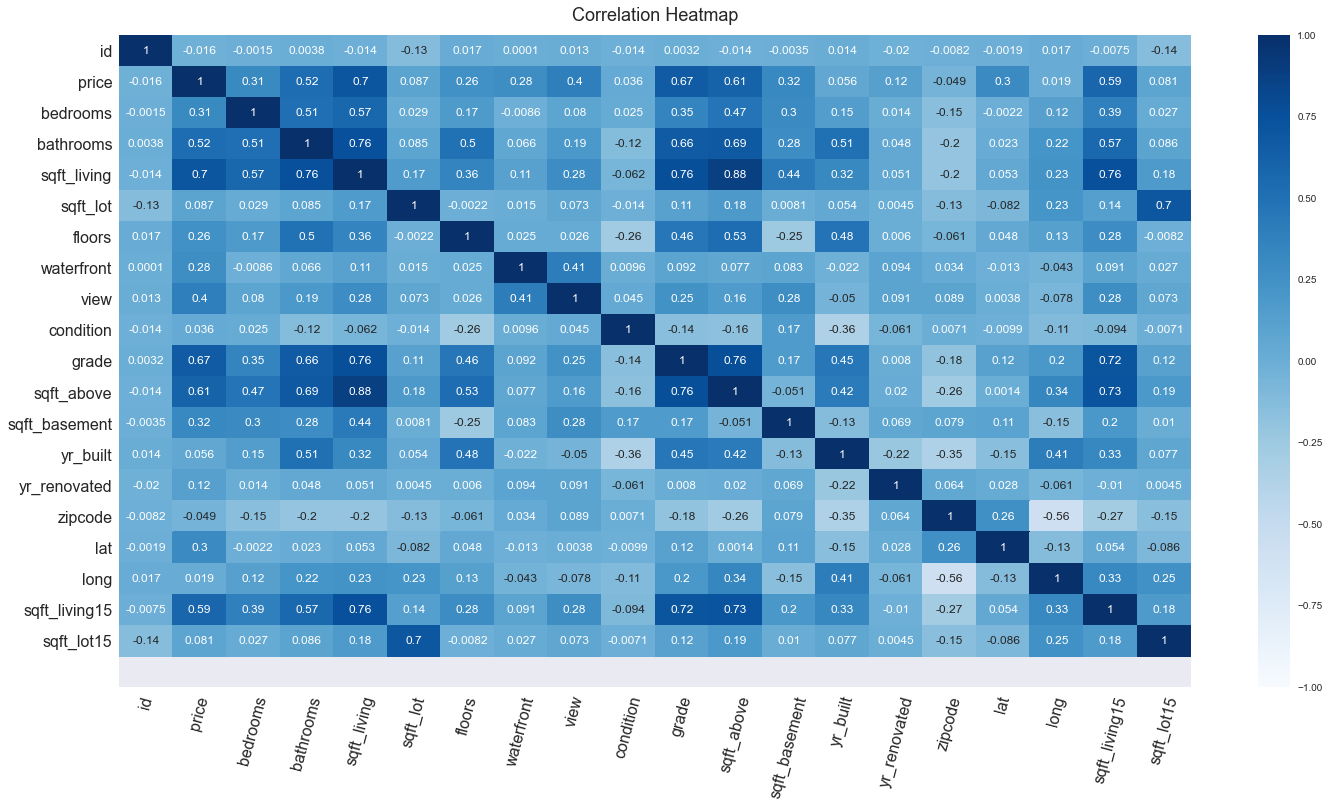

In [17]:
# Increase the size of the heatmap
plt.figure(figsize=(24, 12))
# Help to save the heatmap in high quality
plt.savefig('destination_path.eps', format='eps')
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(train.corr(), vmin=-1, vmax=1, annot=True, cmap='Blues',annot_kws={"size": 12})
# This fixes a randering problem on the top and bottom of the heatmap
plt.ylim([21,0])
plt.style.use('seaborn')
plt.xticks(fontsize=16, rotation=75)
plt.yticks(fontsize=16)
# Adding a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=14);

<strong>IMPORTANT:</strong> The matrix below takes several seconds/minutes to run. For this reason it will be kept commented to make sure that the kernel can restarted and ran faster. In case you want to see it, uncomment the code bellow.

In [19]:
# Uncomment the code bellow to see the scatterplot matrix. It will take several seconds to load

# sns.pairplot(train)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

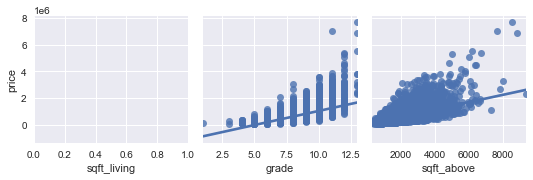

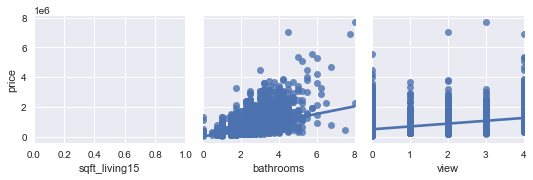

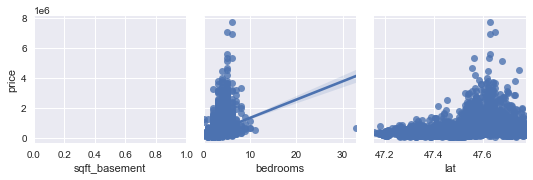

In [21]:
# Scatterplot matrix of the biggest correlations with price with different variables

sns.pairplot(train, x_vars=["sqft_living", "grade", "sqft_above"],y_vars="price",kind = 'reg');
sns.pairplot(train, x_vars=["sqft_living15","bathrooms","view"],y_vars="price",kind = 'reg');
sns.pairplot(train, x_vars=["sqft_basement","bedrooms","lat"],y_vars="price",kind = 'reg');

In [20]:
# Checking features with the highest to the lowest correlation with price

train.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.703540
grade            0.666215
sqft_above       0.607760
sqft_living15    0.585567
bathrooms        0.524335
view             0.395485
sqft_basement    0.323312
bedrooms         0.305106
lat              0.302394
waterfront       0.275779
floors           0.256985
yr_renovated     0.117770
sqft_lot         0.086803
sqft_lot15       0.081423
yr_built         0.056450
condition        0.036099
long             0.019327
id              -0.015644
zipcode         -0.048958
Name: price, dtype: float64

In [24]:
# Checking correlations greater than .7
train.corr() > 7
# df_2 = train[["sqft_living", "grade", "sqft_above","sqft_living15","bathrooms","view",
#               "sqft_basement","bedrooms","lat"]]
# abs(df_2.corr()) >.7

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
price,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_lot,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
